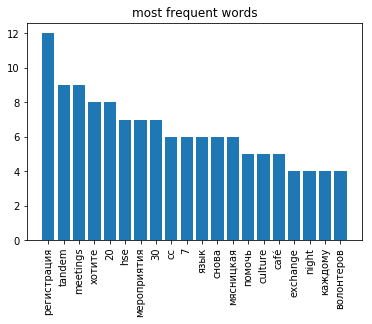

In [37]:
import urllib.request  
import json
import string
import re
import collections
import matplotlib
import matplotlib.pyplot as plt
import os

def getInfo():
    req = urllib.request.Request('https://api.vk.com/method/wall.get?domain=esnhsemsk&v=5.92&access_token=3b4498373b4498373b449837893b2d5a9633b443b44983767eceaa69c02cdeb90d9da85') 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result)
    return data

def dataToText(data):
    with open('name.txt', 'w', encoding='utf-8') as f:
        for item in data['response']['items']:
            try:
                f.write(item['text'])
                f.write('\n')
            except: 
                pass  
        
def wordlistMaker():
    with open('name.txt', 'r', encoding='utf-8') as f:
        text = f.read().lower()
        words = re.split(r'\W+', text)
    return words

def stoplistMaker():
    with open('stoplist.txt', 'r', encoding='utf-8') as f:
        stoplist = f.read().split('\n')
        stoplist.append('https')
        stoplist.append('vk')
    return stoplist

def finalListMaker(wordlist, stopwords):
    final_list = [word for word in wordlist if not word in stopwords]
    return final_list

def plotMaker(X, Y, n):
    x = X[:n]
    y = Y[:n]
    plt.title("most frequent words")
    plt.bar(x,y)
    plt.xticks(x, rotation=90)
    plt.show()
    

    
def main():
    X = []
    Y = []
    dataToText(getInfo())
    # словарь частотностей
    counter = collections.Counter(finalListMaker(wordlistMaker(), stoplistMaker()))
    for key in sorted(counter, key=counter.get, reverse=True):
        X.append(key)
        Y.append(counter[key])
    plotMaker(X, Y, 20)
    
if __name__ == '__main__':
    main()
    

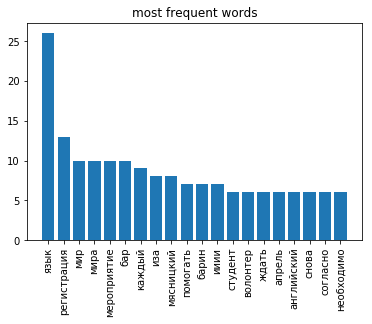

In [42]:
def lemmatized():
    os.system(r"C:\Users\annap\mystem.exe "  + '-clig --eng-gr ' + 'name.txt' + " lemmatized.txt")
    wordsl = []
    with open('lemmatized.txt', 'r', encoding='utf-8') as f:
        text_l = f.read()
#         части речи
#         words = re.findall('[A-Z]+', text_l)    
#     слова с лемматизацией
        l_words = re.findall('[а-я]+', text_l)   
    return l_words

# lemmatized()
def main():
    X = []
    Y = []
#     stops = [] - для частей речи
#     stops.append('HSE')
#     stops.append('NRXRJ')
    dataToText(getInfo())
    # словарь частотностей
    counter = collections.Counter(finalListMaker(lemmatized(), stoplistMaker()))
    for key in sorted(counter, key=counter.get, reverse=True):
        X.append(key)
        Y.append(counter[key])
    plotMaker(X, Y, 20)
    
if __name__ == '__main__':
    main()


In [43]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

# инциализация 
init_notebook_mode(connected=True)

pl_colors = ['rgba'+str(col) for col in colors] # plotly хочет rgba-цвета в немного другом формате

# данные для графика
data = [go.Bar(
            x = city_labs,
            y = city_nums,
            text = ['%.1f %%' % (num) for num in city_percent],  # текст при наведении (например, проценты)
            marker = dict(color=pl_colors)
    )]

# описание 
layout = go.Layout(
    title = 'Города в общежитии ВШЭ',
    xaxis=dict(tickangle = -45),
    yaxis = dict(title='Количество студентов')
)

# добавляем данные и описание на график
fig = go.Figure(data=data, layout=layout)

# рисуем график
iplot(fig)

ModuleNotFoundError: No module named 'plotly'